In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
# !pip install tableone
from tableone import TableOne

In [10]:
# open patient data set from synthea_sample_data_csv_nov2021
df_patients = pd.read_csv('data/synthea_sample_data_csv_nov2021/patients.csv')
df_conditions = pd.read_csv('data/synthea_sample_data_csv_nov2021/conditions.csv')
df_encounters = pd.read_csv('data/synthea_sample_data_csv_nov2021/encounters.csv')
df_procedures = pd.read_csv('data/synthea_sample_data_csv_nov2021/procedures.csv')
df_observations = pd.read_csv('data/synthea_sample_data_csv_nov2021/observations.csv')
df_medications = pd.read_csv('data/synthea_sample_data_csv_nov2021/medications.csv')
df_careplans = pd.read_csv('data/synthea_sample_data_csv_nov2021/careplans.csv')
df_imaging_studies = pd.read_csv('data/synthea_sample_data_csv_nov2021/imaging_studies.csv')
df_immunizations = pd.read_csv('data/synthea_sample_data_csv_nov2021/immunizations.csv')
df_devices = pd.read_csv('data/synthea_sample_data_csv_nov2021/devices.csv')
df_providers = pd.read_csv('data/synthea_sample_data_csv_nov2021/providers.csv')
df_payers = pd.read_csv('data/synthea_sample_data_csv_nov2021/payers.csv')
df_supplies = pd.read_csv('data/synthea_sample_data_csv_nov2021/supplies.csv')
df_careplans = pd.read_csv('data/synthea_sample_data_csv_nov2021/careplans.csv')
df_allergies = pd.read_csv('data/synthea_sample_data_csv_nov2021/allergies.csv')

In [6]:
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17,NaN,999-65-3251,NaN,NaN,NaN,Damon455,Langosh790,NaN,...,Middleborough Massachusetts US,620 Lynch Tunnel Apt 0,Springfield,Massachusetts,Hampden County,1104.0,42.080389,-72.480431,9039.1645,7964.1255
1,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,S99941126,NaN,NaN,Thi53,Wunsch504,NaN,...,Danvers Massachusetts US,972 Tillman Branch Suite 48,Bellingham,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,402723.4150,14064.1350
2,339144f8-50e1-633e-a013-f361391c4cff,1998-05-11,NaN,999-10-8743,S99996708,X75063318X,Mr.,Chi716,Greenfelder433,NaN,...,Athens Athens Prefecture GR,1060 Bernhard Crossroad Suite 15,Boston,Massachusetts,Suffolk County,2131.0,42.292557,-71.061160,571935.8725,787.5375
3,d488232e-bf14-4bed-08c0-a82f34b6a197,2003-01-28,NaN,999-56-6057,S99929424,NaN,Ms.,Phillis443,Walter473,NaN,...,Boston Massachusetts US,677 Ritchie Terrace,Hingham,Massachusetts,Plymouth County,2043.0,42.200491,-70.916076,582557.8030,104782.2070
4,217f95a3-4e10-bd5d-fb67-0cfb5e8ba075,1993-12-23,NaN,999-91-4320,S99991143,X44132498X,Mr.,Jerrold404,Herzog843,NaN,...,Boston Massachusetts US,276 Bernier Branch,Revere,Massachusetts,Suffolk County,NaN,42.381875,-70.999286,475826.8550,18067.0950


In [92]:
# columns to summarize
columns = [
 'RACE',
 'ETHNICITY',
 'GENDER',
 "HEALTHCARE_EXPENSES",
 "HEALTHCARE_COVERAGE",]

# columns containing categorical variables


table = TableOne(df_patients, columns=columns)

table

Missing                Overall
n                                                                    1163
RACE, n (%)                    asian             0               73 (6.3)
                               black                             96 (8.3)
                               hawaiian                          18 (1.5)
                               native                             2 (0.2)
                               other                             11 (0.9)
                               white                           963 (82.8)
ETHNICITY, n (%)               hispanic          0              105 (9.0)
                               nonhispanic                    1058 (91.0)
GENDER, n (%)                  F                 0             616 (53.0)
                               M                               547 (47.0)
HEALTHCARE_EXPENSES, mean (SD)                   0  1256248.5 (1148747.3)
HEALTHCARE_COVERAGE, mean (SD)                   0    171768.4 (488574.9)

In [ ]:
# census data for comparison: https://www.census.gov/quickfacts/MA
# asian: 7,7%
# white: 79.4%
# black: 9.5%
# hawaiian: 0.1%
# native: 1.3%


## Part 2 - find patients with diabetes


In [140]:
df_conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2013-06-24,2013-07-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002,Acute bronchitis (disorder)
1,2016-02-27,2016-03-14,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005,Laceration of forearm
2,2016-08-11,2016-08-22,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,36d2e781-4655-0a11-1f70-c69856e02019,444814009,Viral sinusitis (disorder)
3,2016-11-27,2016-12-17,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009,Viral sinusitis (disorder)
4,2017-02-22,2017-06-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001,Fracture of ankle


In [141]:
set(df_conditions.DESCRIPTION)

{'Acquired coagulation disorder (disorder)',
 'Acute Cholecystitis',
 'Acute allergic reaction',
 'Acute bacterial sinusitis (disorder)',
 'Acute bronchitis (disorder)',
 'Acute deep venous thrombosis (disorder)',
 'Acute pulmonary embolism (disorder)',
 'Acute respiratory distress syndrome (disorder)',
 'Acute respiratory failure (disorder)',
 'Acute viral pharyngitis (disorder)',
 'Alcoholism',
 "Alzheimer's disease (disorder)",
 'Anemia (disorder)',
 'Antepartum eclampsia',
 'Appendicitis',
 'Asthma',
 'At risk for suicide (finding)',
 'Atopic dermatitis',
 'Atrial Fibrillation',
 'Bleeding from anus',
 'Blighted ovum',
 'Body mass index 30+ - obesity (finding)',
 'Body mass index 40+ - severely obese (finding)',
 'Brain damage - traumatic',
 'Bullet wound',
 'COVID-19',
 'Carcinoma in situ of prostate (disorder)',
 'Cardiac Arrest',
 'Cerebral palsy (disorder)',
 'Child attention deficit disorder',
 'Childhood asthma',
 'Chill (finding)',
 'Cholelithiasis',
 'Chronic congestive hea

In [142]:
df_diabetis = df_conditions[df_conditions.CODE == 44054006]

In [143]:
df_diabetis.groupby('PATIENT').count()

,START,STOP,ENCOUNTER,CODE,DESCRIPTION
PATIENT,,,,,
00209bf2-8e4d-06d1-82a4-daad02f25829,1,0,1,1,1
0142b69f-57f0-9a08-4e2d-65a2b77fdea7,1,0,1,1,1
02ceca12-357f-981e-dcf3-3d26d3c1ff82,1,0,1,1,1
060e72d3-912e-55cd-0c92-5faa6cb7a6db,1,0,1,1,1
06629c1a-687d-5121-1e28-ae123c1fe647,1,0,1,1,1
...,...,...,...,...,...
ed803173-5e55-aecd-5055-591164ee3005,1,0,1,1,1
ef167059-cef0-12c4-49db-993ca3a20c01,1,0,1,1,1
fa2d28b1-de84-ac96-ee04-a20dc54832c1,1,0,1,1,1


In [144]:
df_diabetis[df_diabetis.PATIENT.duplicated()]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION


In [169]:
# merge diabetis with patients on PATIENT and Id
df_diabetis_new = df_diabetis.merge(df_patients, left_on='PATIENT', right_on='Id')


In [170]:
df_diabetis_new

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,Id,BIRTHDATE,DEATHDATE,SSN,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,2019-08-21,NaN,aade3c61-92bd-d079-9d28-0b2b7fde0fbb,171b7d43-93a8-309e-0253-dee991740ccd,44054006,Diabetes,aade3c61-92bd-d079-9d28-0b2b7fde0fbb,1985-06-05,NaN,999-93-3123,...,Merrimac Massachusetts US,930 Goldner Stravenue Apt 8,Somerville,Massachusetts,Middlesex County,2138.0,42.363460,-71.102253,9.249573e+05,874.3725
1,2000-09-28,NaN,1cfa5a70-7f3c-4227-5cf1-e182fcff4cd4,d9bbe951-a6b0-a164-cc86-e63ad6cf7a77,44054006,Diabetes,1cfa5a70-7f3c-4227-5cf1-e182fcff4cd4,1958-09-18,NaN,999-24-1375,...,North Westport Massachusetts US,112 Metz Track,Quincy,Massachusetts,Norfolk County,2186.0,42.250009,-70.978059,2.056354e+06,599891.6990
2,2017-01-27,NaN,060e72d3-912e-55cd-0c92-5faa6cb7a6db,2ad929f3-d5b1-86ce-f609-521a335d1d37,44054006,Diabetes,060e72d3-912e-55cd-0c92-5faa6cb7a6db,1969-01-03,NaN,999-66-6825,...,Medford Massachusetts US,941 Rodriguez Trace Suite 61,Quincy,Massachusetts,Norfolk County,2169.0,42.240058,-70.987747,1.816518e+05,262994.9980
3,1998-05-16,NaN,be82309d-1a8f-df82-4cd6-5f03e1060e8e,007435f0-e72d-3cef-48fc-a45b151f6a3c,44054006,Diabetes,be82309d-1a8f-df82-4cd6-5f03e1060e8e,1970-03-07,NaN,999-49-3900,...,Weymouth Massachusetts US,805 Greenfelder Heights,Shirley,Massachusetts,Middlesex County,NaN,42.583591,-71.601383,1.168475e+06,125.5275
4,1992-08-03,NaN,3beee40e-512b-420f-38a3-28e56cddbc9b,79e6c07f-933a-6e85-2b60-9f490e028e75,44054006,Diabetes,3beee40e-512b-420f-38a3-28e56cddbc9b,1952-07-28,NaN,999-52-7932,...,Leicester Massachusetts US,581 Kassulke Trailer Unit 64,Heath,Massachusetts,Franklin County,NaN,42.676444,-72.818084,2.412846e+06,36652.1710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2019-01-02,NaN,80d1297c-3281-6838-9bb4-69cadd701720,6bff908d-e3f2-054b-bd9f-0661ef837262,44054006,Diabetes,80d1297c-3281-6838-9bb4-69cadd701720,1990-10-24,NaN,999-52-4852,...,Springfield Massachusetts US,215 Fay Rue,Yarmouth,Massachusetts,Barnstable County,NaN,41.703255,-70.209239,7.593487e+05,2643.9300
69,1977-04-12,NaN,fc3aa467-2e84-d473-50cc-d6aefa6bd94b,4742a099-945d-1d02-e7b4-7278222d27b7,44054006,Diabetes,fc3aa467-2e84-d473-50cc-d6aefa6bd94b,1955-02-08,NaN,999-75-2001,...,Newton Massachusetts US,311 Hettinger Crossroad Suite 5,Mattapoisett Center,Massachusetts,Plymouth County,NaN,41.678909,-70.837654,2.236317e+06,217392.8050
70,2007-12-05,NaN,9c532b25-cd38-f13a-f2de-2f5538326ed6,567e986d-89f0-e415-7ef6-05b311b9f3f8,44054006,Diabetes,9c532b25-cd38-f13a-f2de-2f5538326ed6,1979-09-26,NaN,999-80-2152,...,Beverly Massachusetts US,374 Connelly Estate,Tewksbury,Massachusetts,Middlesex County,NaN,42.631676,-71.227529,2.211901e+06,24529.8525
71,1981-01-09,NaN,db2bac5f-730a-7f2a-a600-50d75bdf16c8,512370d1-bd15-7816-4d66-ac7a1f4920e7,44054006,Diabetes,db2bac5f-730a-7f2a-a600-50d75bdf16c8,1958-11-07,1997-09-05,999-87-1009,...,Saugus Massachusetts US,245 Wiza Ferry,Marblehead,Massachusetts,Essex County,1945.0,42.484306,-70.863115,1.010733e+06,42693.9375


In [171]:
# count patients with DEATHDATE
no_dead_patients = df_diabetis_new.DEATHDATE.count()
no_total_patients = df_diabetis_new.Id.count()


In [172]:
no_dead_patients/no_total_patients

0.1780821917808219

## Part 3 Lifelines analysis

In [173]:
#!pip install lifelines -q

In [174]:
death_observed = df_diabetis_new.DEATHDATE.notnull()

In [175]:
# set todays date to deathdate for patients without deathdate
df_diabetis_new.DEATHDATE = df_diabetis_new.DEATHDATE.fillna(pd.to_datetime('today'))

In [176]:
# calculate age for each patient
df_diabetis_new['AGE'] = (pd.to_datetime(df_diabetis_new['DEATHDATE']) - pd.to_datetime(df_diabetis_new['BIRTHDATE'])).dt.days/365

In [177]:
list(df_diabetis_new.AGE)

[38.10958904109589,
 64.84109589041095,
 54.53972602739726,
 53.367123287671234,
 70.98630136986301,
 77.72054794520548,
 50.84109589041096,
 50.293150684931504,
 58.443835616438356,
 28.91780821917808,
 45.83561643835616,
 59.986301369863014,
 60.794520547945204,
 80.06027397260274,
 57.85205479452055,
 71.45753424657535,
 52.40547945205479,
 54.28219178082192,
 48.827397260273976,
 56.76712328767123,
 45.61369863013699,
 53.558904109589044,
 63.75890410958904,
 81.64109589041095,
 48.93972602739726,
 50.536986301369865,
 49.63013698630137,
 59.178082191780824,
 62.2,
 108.61643835616438,
 38.367123287671234,
 13.638356164383561,
 46.89041095890411,
 54.61369863013699,
 49.01917808219178,
 82.94246575342466,
 59.62465753424657,
 45.38356164383562,
 99.11232876712329,
 55.53150684931507,
 73.46849315068494,
 64.64657534246575,
 60.04931506849315,
 96.79452054794521,
 49.602739726027394,
 88.30958904109589,
 69.1917808219178,
 91.78356164383561,
 58.394520547945206,
 66.27123287671233,


In [178]:
len(actual_lifetimes)

25

Observed lifetimes at time 108:
 [ 38.10958904  64.84109589  54.53972603  53.36712329  70.98630137
  77.72054795  50.84109589  50.29315068  58.44383562  28.91780822
  45.83561644  59.98630137  60.79452055  80.06027397  57.85205479
  71.45753425  52.40547945  54.28219178  48.82739726  56.76712329
  45.61369863  53.55890411  63.75890411  81.64109589  48.93972603
  50.5369863   49.63013699  59.17808219  62.2        108.61643836
  38.36712329  13.63835616  46.89041096  54.61369863  49.01917808
  82.94246575  59.62465753  45.38356164  99.11232877  55.53150685
  73.46849315  64.64657534  60.04931507  96.79452055  49.60273973
  88.30958904  69.19178082  91.78356164  58.39452055  66.27123288
  67.79452055  70.70958904  90.0630137   74.10136986  78.35342466
  81.38356164  40.88219178 107.34520548  55.25205479  71.84657534
  46.44383562  58.60821918  48.09315068  61.45479452  52.70684932
  80.55342466  63.99452055  76.95068493  32.72054795  68.45205479
  43.80547945  38.85479452  59.1369863 ]


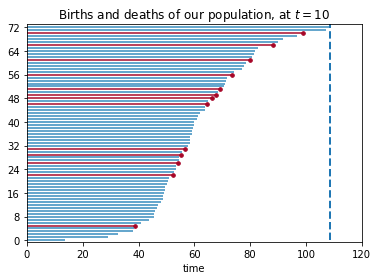

In [185]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential
N = 73
CURRENT_TIME = max(df_diabetis_new.AGE)
actual_lifetimes = list(df_diabetis_new.AGE)
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 120)
ax.vlines(CURRENT_TIME, 0, 73, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)